# Lab 3

## Part I: waves

Download the [wave buoy data for La Perouse Bank (off West Coast of VI)](http://www.ndbc.noaa.gov/station_realtime.php?station=46206). Use the _Real time standard meteorological data_ option. Before you start have a quick look at the _description_ - what kind of data is this? 

Download the data using a shell command. Read the data for the most recent 48 hours and store the first 10 columns into the variables `YY , MM, DD ,hh, mm, WDIR, WSPD, GST,  WVHT, DPD`.

In [32]:
%%bash

wget http://www.ndbc.noaa.gov/data/realtime2/46206.txt

mv 46206.txt data.txt

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
--2018-04-12 22:24:41--  http://www.ndbc.noaa.gov/data/realtime2/46206.txt
Resolving www.ndbc.noaa.gov (www.ndbc.noaa.gov)... 140.90.238.27
Connecting to www.ndbc.noaa.gov (www.ndbc.noaa.gov)|140.90.238.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102554 (100K) [text/plain]
46206.txt: No such file or directory

Cannot write to '46206.txt' (Success).
mv: cannot stat '46206.txt': No such file or directory


In [33]:
import numpy as np

alldata = np.loadtxt("data.txt", usecols = [0,1,2,3,4,6,7,8,9])

newdata = alldata[:48]
YY,MM,DD,hh,mm, WSPD, GST, WVHT,DPD = newdata.T


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-dbb0a72e3c70>", line 3, in <module>
    alldata = np.loadtxt("data.txt", usecols = [0,1,2,3,4,6,7,8,9])
  File "/usr/local/lib/python3.5/dist-packages/numpy/lib/npyio.py", line 898, in loadtxt
    fh = iter(open(fname))
FileNotFoundError: [Errno 2] No such file or directory: 'data.txt'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 1828, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/IPython/

FileNotFoundError: [Errno 2] No such file or directory: 'data.txt'

Create a time variable that starts at `t=0 hrs` with the earliest time and goes forward in hours. Plot the wind speed as a function of this time variable.

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sci']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


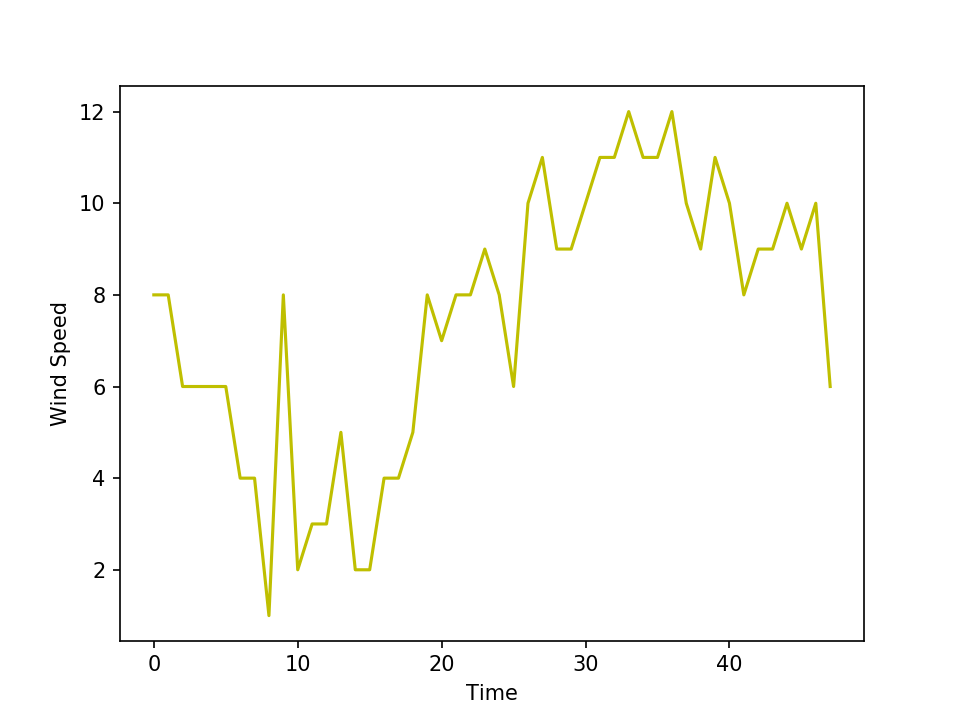

In [34]:
%pylab nbagg

t = np.arange(0,48,1)
hh

plt.close()
fig =1
plt.plot(t,WSPD, 'y')
plt.xlabel("Time")
plt.ylabel("Wind Speed")

Smooth the data by forming a centered moving average (CMA), where each value is replaced by the average of the value and the neighboring value on each side. Plot this smoothed data along with the original data. 

<IPython.core.display.Javascript object>


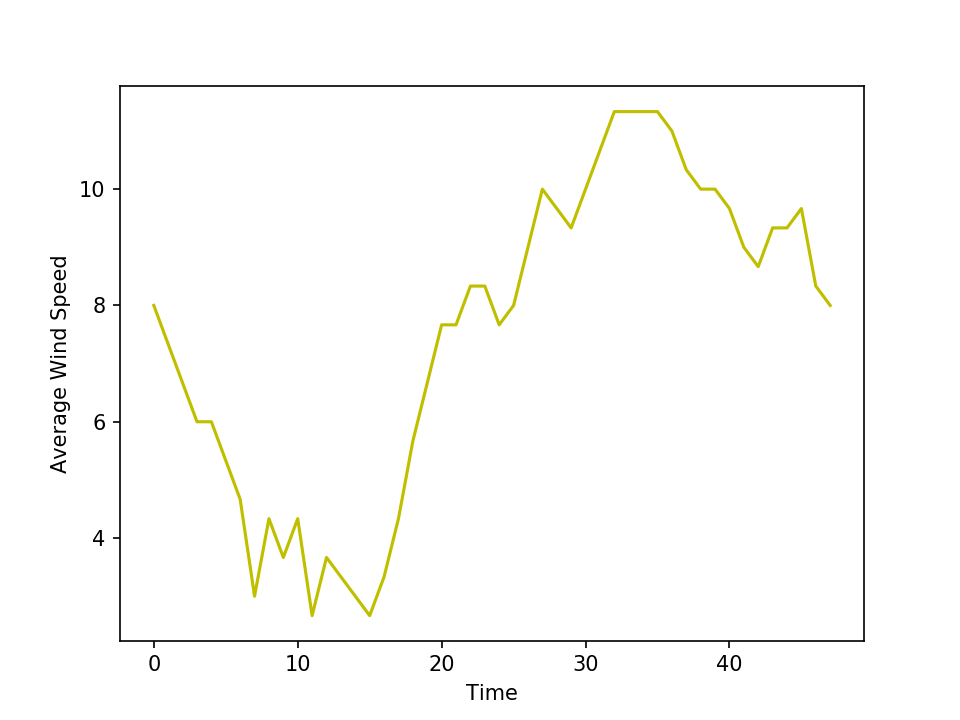

In [35]:
WSPDave = []
for i in range(len(WSPD)):
    if i == 0:
        WSPDave.append((WSPD[i]+WSPD[i+1])/2)
    elif i == 47:
        WSPDave.append((WSPD[i-1]+WSPD[i])/2)
    else:
        WSPDave.append((WSPD[i-1]+WSPD[i]+WSPD[i+1])/3)

plt.close()
fig = 2
plt.plot(t,WSPDave, 'y')
plt.xlabel("Time")
plt.ylabel("Average Wind Speed")

Create a spline fit, using sympy's splrep/splev function. Adjust the smoothing parameter so that the spline fit looks similar to the CMA line.

<IPython.core.display.Javascript object>


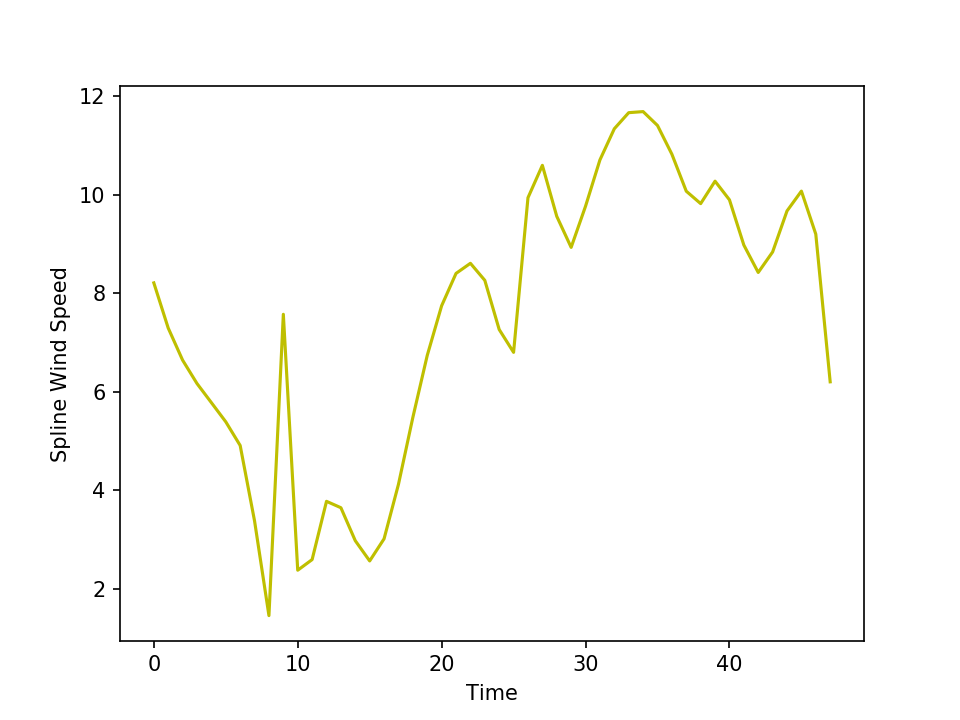

In [50]:
import scipy.interpolate as sc

splinefit = sc.splrep(t, WSPD, s = 20) #changing s changes the smoothness - higher s = higher smoothness

plt.close()
fig = 3
plt.plot(t,sc.splev(t,splinefit,der=0), 'y')
plt.xlabel("Time")
plt.ylabel("Spline Wind Speed")

Make a plot of wave height agains wind speed using smoothed data.

In [38]:
splinefit

(array([  0.,   0.,   0.,   0.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,
          9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,
         20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,
         31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
         42.,  43.,  44.,  45.,  47.,  47.,  47.,  47.]),
 array([  8.        ,   9.96549471,   5.06901057,   6.22981747,
          5.72151782,   6.88411126,   2.74203713,   6.1477402 ,
         -3.33299795,  13.1842516 ,  -1.40400843,   4.43178214,
          1.67687987,   6.86069837,   0.88032663,   1.6179951 ,
          4.64769296,   3.79123305,   4.18737485,   9.45926756,
          5.9755549 ,   8.63851285,   7.4703937 ,   9.47991235,
          8.6099569 ,   4.08026003,  11.06900296,  11.64372812,
          8.35608457,   8.93193362,   9.91618097,  11.40334251,
         10.47044898,  12.71486156,  10.67010478,  10.60471933,
         12.91101791,   9.75120903,   8.08414597,  11.91220708,
      

## Part II: units
How much water do you have to store on your 10m high roof-top in order to store enough potential energy, that - if transformed without losses - could run a 50W bulp for 5 hr?

In [17]:
import astropy.units as u
import astropy.constants as c

In [22]:
energy = 50*u.W*5*u.hr
energy.to("J")

mass = energy/(c.g0*10*u.m)

mass.to('kg')

<Quantity 9177.445916801355 kg>

## Part III: integrate 
Using scipy's `integrate.cumtrapz` integrate one more time the area under a quadrant of a circle to determine $\pi$.


In [28]:
dx = 0.01
x = np.linspace(0,1)
y = np.sqrt(1-x**2)

import scipy.integrate as sci

ans = sci.cumtrapz(x, y, dx)[-1]

In [30]:
ans*4

-3.138166277022103